# AI初始化生成训练策略，结果没法看

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
from ResNet import ResNet18
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. 数据准备
def prepare_data(batch_size=32):
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    val_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size)
    return train_loader, val_loader


In [3]:

def train_model(model, train_loader, val_loader, epochs=10, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # 初始化记录器
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    for epoch in range(epochs):
        # 训练阶段
        model.train()
        train_loss, correct = 0, 0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
            
        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, labels).item()
                val_correct += (outputs.argmax(1) == labels).sum().item()
        
        # 打印统计信息
            # 修改统计信息打印部分
        # print(f"\nTrain Loss: {train_loss/len(train_loader):.4f} | "
          # f"Train Acc: {correct/len(train_loader.dataset)*100:.2f}%")
        # print(f"Val Loss: {val_loss/len(val_loader):.4f} | "
          # f"Val Acc: {val_correct/len(val_loader.dataset)*100:.2f}%")
        
         
    # 修改记录指标部分
        history['train_acc'].append(correct/len(train_loader.dataset))
        history['val_acc'].append(val_correct/len(val_loader.dataset))

    # 修改打印部分
        print(f"\nTrain Loss: {train_loss/len(train_loader):.4f} | "
          f"Train Acc: {correct/len(train_loader.dataset)*100:.2f}%")
        print(f"Val Loss: {val_loss/len(val_loader):.4f} | "
          f"Val Acc: {val_correct/len(val_loader.dataset)*100:.2f}%")
            # 记录指标
        history['train_loss'].append(train_loss/len(train_loader))
        # history['train_acc'].append(correct/len(train_data))
        history['val_loss'].append(val_loss/len(val_loader))
        # history['val_acc'].append(val_correct/len(val_data))
        
        # 打印统计信息
#         print(f"\nTrain Loss: {history['train_loss'][-1]:.4f} | "
#               f"Train Acc: {history['train_acc'][-1]*100:.2f}%")
#         print(f"Val Loss: {history['val_loss'][-1]:.4f} | "
#               f"Val Acc: {history['val_acc'][-1]*100:.2f}%")
    
    # 可视化训练过程
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train')
    plt.plot(history['val_loss'], label='Validation')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train')
    plt.plot(history['val_acc'], label='Validation')
    plt.title('Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return history


Epoch 1/10: 100%|██████████| 1563/1563 [01:52<00:00, 13.90it/s]



Train Loss: 1.4497 | Train Acc: 46.87%
Val Loss: 1.1031 | Val Acc: 61.65%


Epoch 2/10: 100%|██████████| 1563/1563 [01:50<00:00, 14.13it/s]



Train Loss: 0.8652 | Train Acc: 69.65%
Val Loss: 0.7794 | Val Acc: 73.01%


Epoch 3/10: 100%|██████████| 1563/1563 [01:51<00:00, 13.99it/s]



Train Loss: 0.6566 | Train Acc: 77.34%
Val Loss: 0.6270 | Val Acc: 78.50%


Epoch 4/10: 100%|██████████| 1563/1563 [01:51<00:00, 14.03it/s]



Train Loss: 0.5234 | Train Acc: 81.89%
Val Loss: 0.6011 | Val Acc: 79.58%


Epoch 5/10: 100%|██████████| 1563/1563 [01:50<00:00, 14.09it/s]



Train Loss: 0.4210 | Train Acc: 85.42%
Val Loss: 0.5779 | Val Acc: 80.15%


Epoch 6/10: 100%|██████████| 1563/1563 [01:51<00:00, 14.02it/s]



Train Loss: 0.3226 | Train Acc: 88.86%
Val Loss: 0.5512 | Val Acc: 82.02%


Epoch 7/10: 100%|██████████| 1563/1563 [01:51<00:00, 14.02it/s]



Train Loss: 0.2288 | Train Acc: 91.90%
Val Loss: 0.5664 | Val Acc: 82.79%


Epoch 8/10: 100%|██████████| 1563/1563 [01:51<00:00, 13.97it/s]



Train Loss: 0.1659 | Train Acc: 94.09%
Val Loss: 0.6378 | Val Acc: 82.21%


Epoch 9/10: 100%|██████████| 1563/1563 [01:51<00:00, 14.05it/s]



Train Loss: 0.1209 | Train Acc: 95.68%
Val Loss: 0.6225 | Val Acc: 83.01%


Epoch 10/10: 100%|██████████| 1563/1563 [01:50<00:00, 14.12it/s]



Train Loss: 0.0939 | Train Acc: 96.69%
Val Loss: 0.6612 | Val Acc: 83.31%


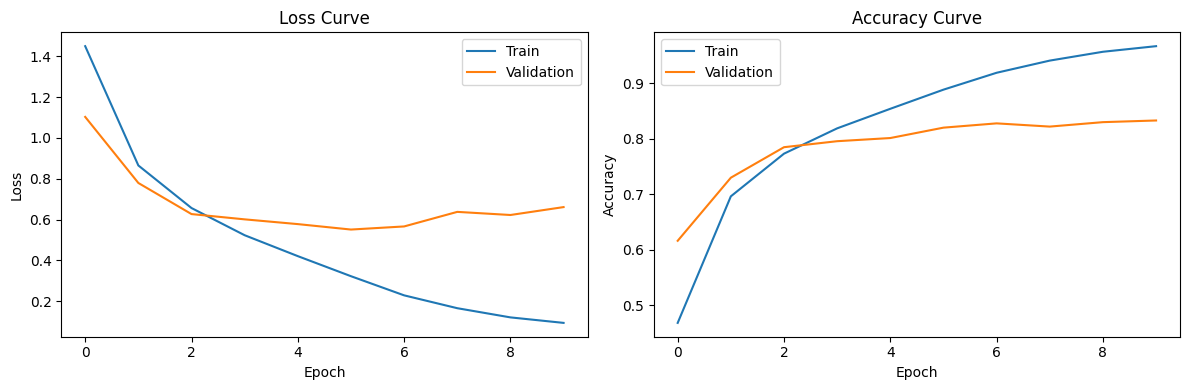

{'train_loss': [1.4496695034715965,
  0.8652272201736082,
  0.6566059387843729,
  0.5233822991393425,
  0.42095662713031773,
  0.32263283191519293,
  0.22883298263068164,
  0.16586889896210538,
  0.12085283666215146,
  0.09391616238802504],
 'train_acc': [0.46868,
  0.69654,
  0.77336,
  0.81894,
  0.85416,
  0.8886,
  0.91902,
  0.94092,
  0.95682,
  0.9669],
 'val_loss': [1.103120981504361,
  0.7793921762571548,
  0.6270036317003421,
  0.6011465193269352,
  0.5778757411831865,
  0.5512149342523215,
  0.5664242763345996,
  0.6378021911560251,
  0.6225279535824498,
  0.6612338575120932],
 'val_acc': [0.6165,
  0.7301,
  0.785,
  0.7958,
  0.8015,
  0.8202,
  0.8279,
  0.8221,
  0.8301,
  0.8331]}

In [4]:
model = ResNet18(num_classes=10)
train_loader, val_loader = prepare_data()
    
 # 开始训练
train_model(model, train_loader, val_loader, epochs=10)